# Read Cadence of LSST
======================================

- author : Sylvie Dagoret-Campagne
- date : March 13th 2018

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from astropy.time import Time

In [3]:
import sqlite3

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
conn = sqlite3.connect('./minion_1016_sqlite.db')

In [6]:
cursor=conn.cursor()

In [7]:
cursor=conn.execute("SELECT obsHistID, night,expDate,expMJD,filter,airmass,Field_fieldID from ObsHistory")

In [8]:
all_nights = []
all_expDate = []
all_expMJD = []
all_airmass = []
all_filter = []
all_field = []

for row in cursor:
    obshistid = row[0]
    night=row[1]
    all_nights.append(night)
    expdate=row[2]
    all_expDate.append(expdate)
    expmgd=row[3]
    all_expMJD.append(expmgd)
    thefilter=row[4]
    all_filter.append(thefilter)
    airmass=row[5]
    all_airmass.append(airmass)
    field=row[6]
    all_field.append(field)
  

In [9]:
all_nights=np.array(all_nights)
all_expDate=np.array(all_expDate)
all_expMJD=np.array(all_expMJD)
all_airmass=np.array(all_airmass)
all_field=np.array(all_field)

In [31]:
all_filter=np.array(all_filter)

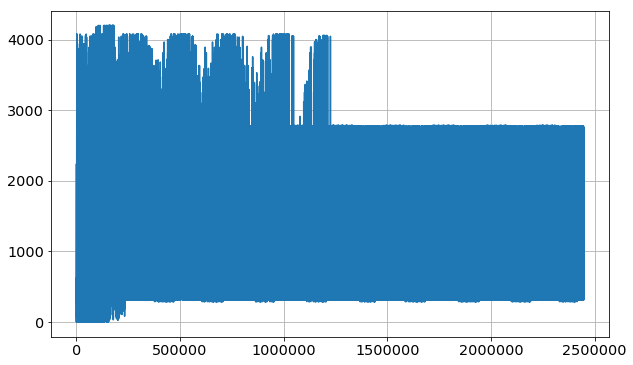

In [10]:
plt.plot(all_field)
plt.grid()

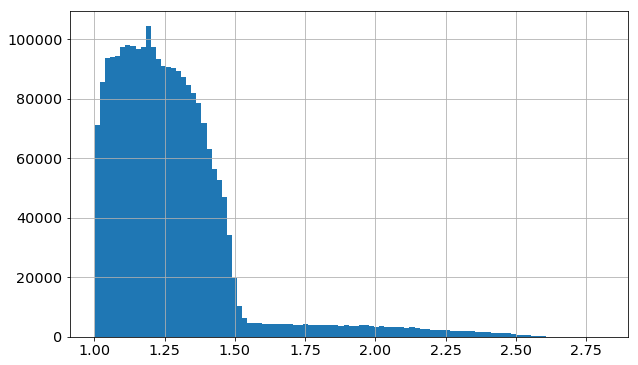

In [11]:
plt.hist(all_airmass,bins=100);
plt.grid()

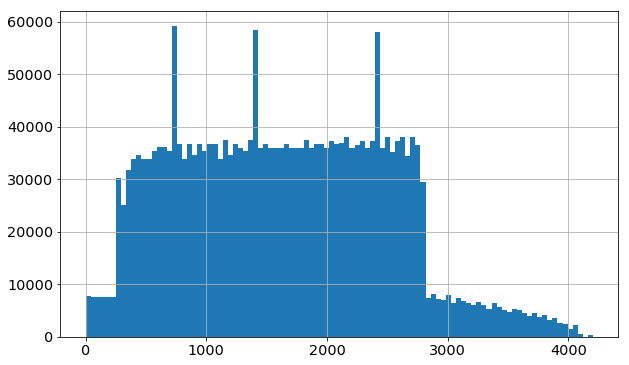

In [12]:
plt.hist(all_field,bins=100);
plt.grid()

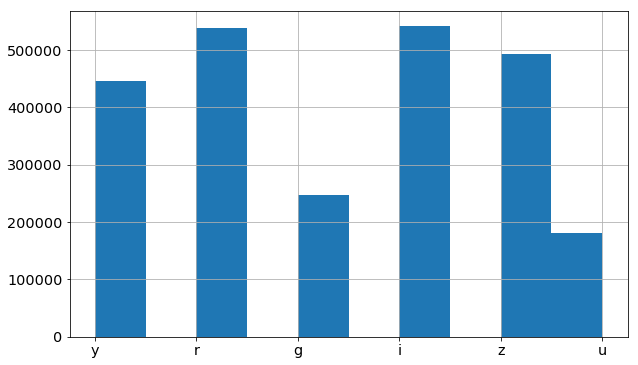

In [13]:
plt.hist(all_filter);
plt.grid()

In [14]:
all_tt = Time(all_expMJD,format='mjd')

In [15]:
all_tt[0:10]

<Time object: scale='utc' format='mjd' value=[ 59580.033829  59580.034275  59580.034722  59580.035169  59580.035616
  59580.036062  59580.036509  59580.036955  59580.037401  59580.037847]>

In [16]:
all_tt.plot_date

array([ 738156.033829,  738156.034275,  738156.034722, ...,  741805.361186,
        741805.361633,  741805.362084])

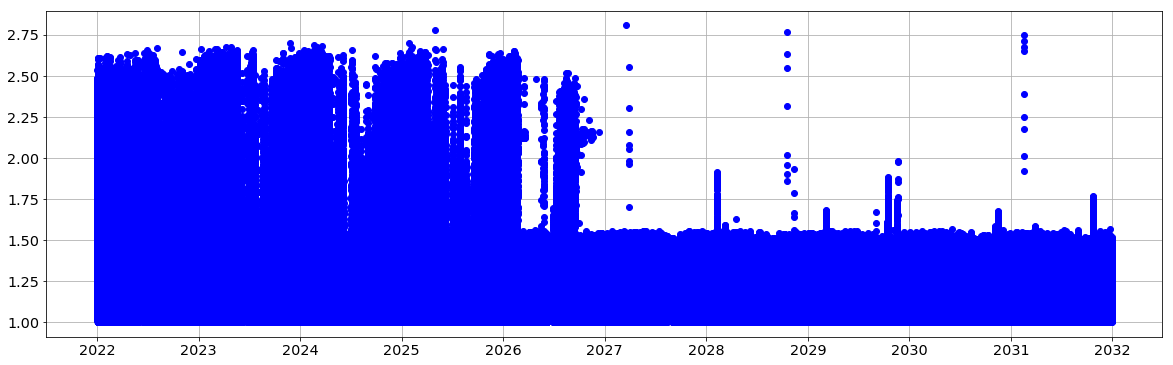

In [17]:
plt.figure(figsize=(20,6))
plt.plot_date(all_tt.plot_date, all_airmass, fmt="bo", xdate=True)
plt.grid()

In [18]:
import astropy.coordinates as coord

In [19]:
selected_field=1000

In [25]:
all_indexes=np.where(all_field==selected_field)[0]

In [27]:
all_indexes

array([ 127632,  127669,  136946,  136992,  137989,  141214,  141221,
        141391,  145483,  145486,  145519,  145537,  145755,  146824,
        147452,  147488,  159084,  159984,  160023,  160177,  160227,
        165455,  165489,  169362,  172141,  172174,  173300,  173342,
        176997,  177039,  178500,  181715,  181764,  184578,  184623,
        185075,  185102,  187046,  187084,  189751,  189784,  196038,
        196068,  200547,  201149,  206660,  206685,  206705,  209386,
        209418,  210279,  213436,  213470,  224539,  224585,  235820,
        245855,  245903,  333427,  340168,  340199,  342574,  342626,
        346474,  346497,  354339,  354370,  355434,  356336,  356368,
        357370,  357397,  357412,  357446,  363543,  363574,  364400,
        364422,  365780,  365815,  369407,  369520,  369557,  370419,
        370421,  376337,  377989,  378020,  382054,  382058,  382069,
        382080,  383141,  383164,  384172,  384215,  391649,  393186,
        393215,  394

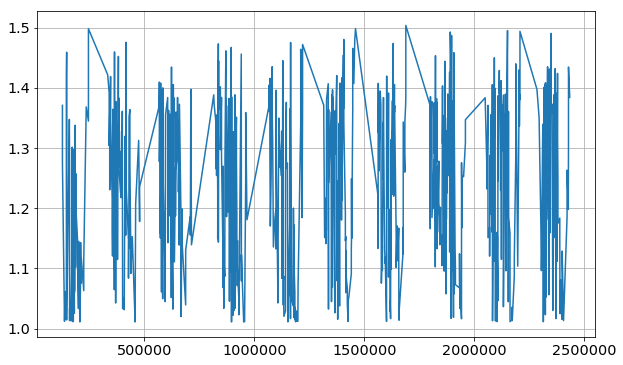

In [29]:
plt.plot(all_indexes,all_airmass[all_indexes])
plt.grid()

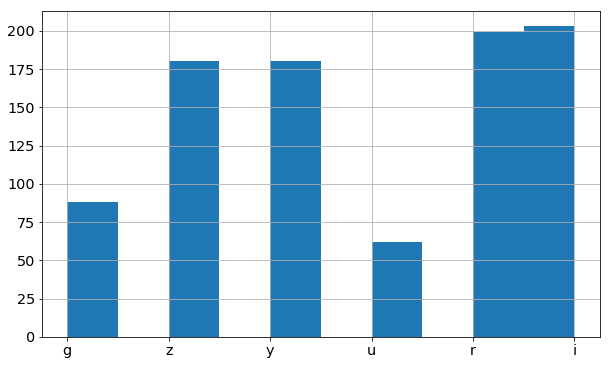

In [32]:
plt.hist(all_filter[all_indexes]);
plt.grid()